In [1]:
import pandas as pd
import numpy as np

pathDict = {
    "femaleV1":{"rsp":"liwc_female_responses", "vals":"liwc_female_orig_mod_vals", "mod_feat":"liwc_femal_mod", "orig_feat":"liwc_femal_orig"},
    "femaleV2":{"rsp":"liwc_female_v2_responses", "vals":"liwc_female_orig_mod_vals", "mod_feat":"liwc_femal_mod", "orig_feat":"liwc_femal_orig"},
    "my_mine":{"rsp":"my_mine_responses_v2", "vals":"my_mine_orig_mod_vals", "mod_feat":"my_mine_mod", "orig_feat":"my_mine_orig"},
    "cond":{"rsp":"dummy", "vals":"cond_orig_mod_vals", "mod_feat":"liwc_female mod", "orig_feat":"liwc_female orig"},
}
experiment = "cond"
responses = pd.read_csv("../datasets/"+pathDict[experiment]["rsp"]+".csv") #Options: "liwc_female_responses.csv", "liwc_female_v2_responses.csv"
liwc_vals = pd.read_csv("../datasets/"+pathDict[experiment]["vals"]+".csv") #Options: "liwc_female_orig_mod_vals.csv", "my_mine_orig_mod_vals.csv"
print(liwc_vals.columns)
print(responses.columns)

Index(['post_id', 'liwc_female orig', 'AHR original predict',
       'AHR original actual', 'AHR modified predict', 'liwc_female mod',
       'conditional_feature_value', 'notes'],
      dtype='object')
Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'heartatk', 'consent',
       'scenario_1_action', 'scenario_1_person', 's1t_First Click',
       's1t_Last Click', 's1t_Page Submit', 's1t_Click Count',
       'scenario_2_action', 'scenario_2_person', 's2t_First Click',
       's2t_Last Click', 's2t_Page Submit', 's2t_Click Count',
       'scenario_3_action', 'scenario_3_person', 's3t_First Click',
       's3t_Last Click', 's3t_Page Submit', 's3t_Click Count',
       'scenario_4_action', 'scenario_4_person', 's4t_Firs

In [2]:
print(responses.shape)


(35, 74)


In [3]:
print(responses['AC'].value_counts())
print(responses['q_3_is_modified'].isna().sum())


1                                                                 32
In this task, you read five passages that all dealt with what?     1
{"ImportId":"QID73"}                                               1
3                                                                  1
Name: AC, dtype: int64
16


In [4]:
df = responses.loc[(responses["heartatk"] =="4")& (responses["consent"] =="1")]

df_fil = df.dropna(subset=["scenario_1_action", "scenario_2_action", "scenario_3_action", "scenario_4_action", "scenario_5_action"])
df_fil = df_fil.dropna(subset=["scenario_1_person", "scenario_2_person", "scenario_3_person", "scenario_4_person", "scenario_5_person"])
df_fil = df_fil.dropna(subset=["q_1_id", "q_2_id", "q_3_id", "q_4_id", "q_5_id"])
print(df.shape)
colMax = {1: {"action":df_fil["scenario_1_action"].astype("int").max(), "person":df_fil["scenario_1_person"].astype("int").max()}, 2: {"action":df_fil["scenario_2_action"].astype("int").max(), "person":df_fil["scenario_2_person"].astype("int").max()}, 3: {"action":df_fil["scenario_3_action"].astype("int").max(), "person":df_fil["scenario_3_person"].astype("int").max()}, 4: {"action":df_fil["scenario_4_action"].astype("int").max(), "person":df_fil["scenario_4_person"].astype("int").max()}, 5: {"action":df_fil["scenario_5_action"].astype("int").max(), "person":df_fil["scenario_5_person"].astype("int").max()}, }
colMin = {1: {"action":df_fil["scenario_1_action"].astype("int").min(), "person":df_fil["scenario_1_person"].astype("int").min()}, 2: {"action":df_fil["scenario_2_action"].astype("int").min(), "person":df_fil["scenario_2_person"].astype("int").min()}, 3: {"action":df_fil["scenario_3_action"].astype("int").min(), "person":df_fil["scenario_3_person"].astype("int").min()}, 4: {"action":df_fil["scenario_4_action"].astype("int").min(), "person":df_fil["scenario_4_person"].astype("int").min()}, 5: {"action":df_fil["scenario_5_action"].astype("int").min(), "person":df_fil["scenario_5_person"].astype("int").min()}, }
print(colMax)
print(colMin)

(33, 74)
{1: {'action': 46, 'person': 44}, 2: {'action': 39, 'person': 36}, 3: {'action': 39, 'person': 36}, 4: {'action': 39, 'person': 37}, 5: {'action': 39, 'person': 37}}
{1: {'action': 40, 'person': 38}, 2: {'action': 33, 'person': 31}, 3: {'action': 33, 'person': 31}, 4: {'action': 33, 'person': 31}, 5: {'action': 33, 'person': 31}}


In [5]:
print(df['scenario_1_action'].value_counts())
print(df.shape)

42    11
40     6
45     5
43     4
44     3
41     3
46     1
Name: scenario_1_action, dtype: int64
(33, 74)


In [6]:
import math
csv_col_modified = pathDict[experiment]["mod_feat"] 
csv_col_orig = pathDict[experiment]["orig_feat"]  

def is_float(element) -> bool:
    try:
        float(element)
        return True
    except ValueError:
        return False

def recodeValues(columnIdx, isAction, value):
    if str(value).strip().lower()=="nan":
        return None
    value = int(value)
    return value - colMin[columnIdx]["action" if isAction else "person"] +1
    
def getLiwcVals(type, id):
    col = csv_col_orig if type == "orig" else csv_col_modified
    #print(id)
    to_ret =liwc_vals.loc[liwc_vals["post_id"]==id][col].item()
    return float(to_ret)
    
new_format =[]
# New format is: id, is_modified, answer_action,answer_person
badEntryCounter=0
for index, row in df.iterrows():
    if "2022-08-01" in row["StartDate"]:
        continue
        print(row["StartDate"])
    dmy = str(row["gender"]).strip().lower()
    gender = None
    if dmy == "4":
        gender =1
    elif dmy=="5":
        gender = -1
    elif dmy=="6":
        gender = 2
    elif dmy=="7":
        gender=3
    else:
        badEntryCounter+=1

    for i in range(1,6):
        r_id = row[f"q_{i}_id"]
        #print(type(r_id))
        if  (is_float(r_id) and math.isnan(r_id)) or (r_id.isnumeric() and math.isnan(int(r_id))):
            badEntryCounter+=1
            #not sure if bad entry counter is correct or should be diveded by 4
            continue
       
        r_isMod = 1 if row[f"q_{i}_is_modified"] == "true" else -1
        r_action =  recodeValues(i, True, row[f"scenario_{i}_action"])
        r_person = recodeValues(i, False, row[f"scenario_{i}_person"])
        r_age = None if str(row["age"]).strip().lower() == "nan" else int(math.floor(float(row["age"]))) if "." in row["age"] else int(row["age"])
        r_gender = gender
        r_responseId = row["ResponseId"]
        r_ac = row["AC"]

        #print(r_id)
        if "IMTA for getting a cat" in r_id:
            r_id = "k5kh4d"
        r_liwcOrig = getLiwcVals("orig", r_id)
        r_liwcMod = getLiwcVals("modified", r_id)
        cond_low = ["k5n8gp","ayuhfj","d7rqv7","da5lf4","d8tktt","di121p","e6gioh","kbfqn0","d7bwco","lflkbi","ghb1qd","dq7o60","c16a49","azhjxy","b6ex3u","bt96e5","jmyghg","acx62a","cwd2sm","d11pwp"]
        cond_high=["d2z9tl","j0rubv","dhswh1","hptojb","eq475l","Ds0fwd","ikxa0t","jpgxl6","bt8iou","ec7ciw","ehyyhk","ck5jvn","m46pif","lol9kc","bs5p6l","dn6075","jncy5t","hql2q4","cjudzm","n2wjkt"]
        r_is_cond_high = 1 if r_id in cond_high else -1
        r_i = [r_id, r_isMod, r_action, r_person, r_age, r_gender, r_responseId, r_ac, r_liwcOrig, r_liwcMod, r_is_cond_high ]
        new_format.append(r_i)


print("NAN values:",badEntryCounter)
df_new_format = pd.DataFrame(np.array(new_format), columns=['scenarioId', 'isModified', 'scenarioAction', 'scenarioPerson', "age", "gender", "responseId", "acResponse", "originalFeatureValue", "modifiedFeatureValue", "isConditionalHigh"], )
df_new_format["isModified"] = df_new_format["isModified"].astype("float").astype("Int64")
df_new_format["scenarioAction"] = df_new_format["scenarioAction"].astype("float").astype("Int64")
df_new_format["scenarioPerson"] = df_new_format["scenarioPerson"].astype("float").astype("Int64")
df_new_format["gender"] = df_new_format["gender"].astype("float").astype("Int64")
df_new_format["age"] = df_new_format["age"].astype("float").astype("Int64")
df_new_format["originalFeatureValue"] = df_new_format["originalFeatureValue"].astype("float").astype("Float64")
df_new_format["modifiedFeatureValue"] = df_new_format["modifiedFeatureValue"].astype("float").astype("Float64")
df_new_format["isConditionalHigh"] = df_new_format["isConditionalHigh"].astype("float").astype("Int64")



print("TRANSFORMED OUTPUT STILL CONTAINS ATTENTION CHECK")

NAN values: 0
TRANSFORMED OUTPUT STILL CONTAINS ATTENTION CHECK


165
        0
hptojb  7
dq7o60  7
ec7ciw  4
ayuhfj  4
d11pwp  5
azhjxy  4
di121p  3
eq475l  4
kbfqn0  4
bt96e5  4
cwd2sm  4
ghb1qd  5
d7rqv7  4
bs5p6l  4
ck5jvn  9
d8tktt  5
hql2q4  6
d7bwco  4
m46pif  4
e6gioh  5
jpgxl6  3
ikxa0t  5
lflkbi  5
bt8iou  3
Ds0fwd  3
jmyghg  4
lol9kc  5
dn6075  5
c16a49  1
da5lf4  5
bkd310  2
k5n8gp  6
cjudzm  2
jncy5t  4
ehyyhk  5
b6ex3u  4
dhswh1  2
j0rubv  3
n2wjkt  2
sum 165
chiSquare Power_divergenceResult(statistic=21.018181818181812, pvalue=0.9883944867848904)


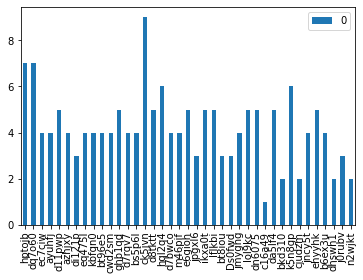

In [9]:
from collections import Counter

ids = list(map(lambda x:x[0],df_new_format[["scenarioId"]].values.tolist()))

print(len(ids))
id_counter = Counter(ids)
#df_new_format[["scenarioId"]].apply(pd.value_counts).plot(kind='bar', subplots=True)
#print(df_new_format.shape)
#print(df_new_format.dtypes)

df_counter = pd.DataFrame.from_dict(id_counter, orient='index')
df_counter.plot(kind='bar')
print("sum", np.sum(list(id_counter.values())))
from scipy.stats import chisquare
import random
rnd  = [random.randint(1, 20) for i in range(640)]

print("chiSquare", chisquare(list(id_counter.values())))



In [9]:
#print(df_new_format['scenarioPerson'].value_counts())
#print(df_new_format["originalFeatureValue"].head(10))
print(df_new_format.isna().sum())
print(df_new_format.isin(['nan']).sum(axis=0))

scenarioId              0
isModified              0
scenarioAction          3
scenarioPerson          3
age                     5
gender                  5
responseId              0
acResponse              5
originalFeatureValue    0
modifiedFeatureValue    0
isConditionalHigh       0
dtype: int64
scenarioId              0
isModified              0
scenarioAction          0
scenarioPerson          0
age                     0
gender                  0
responseId              0
acResponse              0
originalFeatureValue    0
modifiedFeatureValue    0
isConditionalHigh       0
dtype: int64


In [8]:
hist = df_new_format.hist(bins=30)

NameError: name 'df_new_format' is not defined

In [26]:
df_new_format.to_excel(pathDict[experiment]["rsp"]+"-transformed_final.xlsx", index=False)

In [24]:
df_new = df_new_format.dropna(axis='rows')

id_dict = {}
for index, row in df_new.iterrows():
    id = row["scenarioId"]
    jdgAction = row["scenarioAction"]
    jdgPerson = row["scenarioPerson"]
    
    isMod = row["isModified"]
    if id in id_dict:
        tmp = id_dict[id]
        tmp["action"+str(isMod)].append(jdgAction)
        tmp["person"+str(isMod)].append(jdgPerson)
        id_dict[id] = tmp
    else:
        tmp = {}
        if isMod > 0:
            tmp["action-1"] = []
            tmp["person-1"] = []
            tmp["action1"] = [jdgAction]
            tmp["person1"] = [jdgPerson]
        else: 
            tmp["action1"] = []
            tmp["person1"] = []
            tmp["action-1"] = [jdgAction]
            tmp["person-1"] = [jdgPerson]
        id_dict[id] = tmp


In [25]:
import statistics
data = []
for index, row in liwc_vals.iterrows():
    AHR_orig = row["AHR original actual"]
    my_mine_orig = row["my_mine_orig"]
    my_mine_modified = row["my_mine_mod"]
    id = row["post_id"]
    actionModified = statistics.mean(id_dict[id]["action1"])
    personModified = statistics.mean(id_dict[id]["person1"])
    actionOrig = statistics.mean(id_dict[id]["action-1"])
    personOrig = statistics.mean(id_dict[id]["person-1"])
    tmp_row =[id, AHR_orig, my_mine_orig, actionOrig, personOrig, my_mine_modified, actionModified, personModified]
    tmp_row_np = np.array(list(map(lambda x:str(x), tmp_row)))
    data.append(tmp_row_np)

np_data = np.array(data,dtype=object)
print(np_data.shape)

df_dunno = pd.DataFrame(np_data,
                   columns=['post_id', 'asshole_ratio_original', 'my_mine_original', "action_avg_original", "person_avg_original", "my_mine_modified","action_avg_modified", "person_avg_modified"])

df_dunno.to_excel("my_mine_transformed_final.xlsx",index=False)

(20, 8)
